<a href="https://colab.research.google.com/github/saifulislamsarfaraz/Statistics-for-Data-Science/blob/main/ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents: 
**1. Intuition**  
<br/>
     1.1 What is Regularization  
     1.2 Ridge Regression  
     1.3 Lasso Regression  
     1.4 Elastic Net Regression  
     1.5 Key differences  
     1.6 Criteria to choose regularization method
     <br/>

**2. Example with Diabetes Dataset**  
2.1 Importing necessary modules along with dataset  
2.2 Data processing  
2.3 Linear Regression Model  
2.4 Ridge Regression  
2.5 Ridge Regression with GridSearchCV  
2.6 Lasso Regression

2.7 Elastic Net Regression

2.8 Elastic Net Regression with GridSearchCV  

2.9 Conclusion

<br/>
<br/>

## 1.1 What is Regularization

Getting a good accuracy score isn't always pleasant to a data scientist specially when he gets a good training accuracy along with a poor test accuracy. Though this type of model can predict the training set very well, but it can't perform well for the test as well as new dataset. This type of situation or model is called **Overfitting**. So how can we solved this problem?
<br/>

Here comes up **Regularizaton** to solve this problem. So in short, we can say that Regularizaton is the process to prevent a model to be overfitted.
<br/>

But how? Regularization can be carried out by **Ridge Regression**, **Lasso Regression** and **Elastic Net Regression**. We will try to learn how these regression work and reduce the risk of overfitting throughout this kernel.

<br/>


<br/>

## 1.2 Ridge Regression

It's also called L2 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Ridge Regression penalty =  lambda1  x  square of the magnitude of the coefficients**
<br/>

By shrinking the coefficients Ridge Regession reduces the model complexity and multi-collinearity. But it keeps all the variables.

<br/>

## 1.3 Lasso Regression

It's also called L1 regularization. It shrinks the coefficients by adding a penalty to the least squares.
<br/>

**Lasso Regression penalty =  lambda2  x  |the magnitude of the coefficients|**
<br/>

By shrinking the coefficients Lasso Regession also reduces the model complexity and multi-collinearity like Ridge Regression. But in Lasso Regression, the coefficients of less important variables get multiplied by zero and removed.

<br/>

## 1.4 Elastic Net Regression

Elastic Net is the combination of Ridge and Lasso Regression. It has both Ridge Regression penalty and Lasso Regression penalty in it's own penalty.
<br/>

**Elastic Net Regression penalty = lambda1 x square of the magnitude of the coefficients + lambda2 x |the magnitude of the coefficients|**
<br/>

When,  
lambda1 = lambda2 = 0       -     Elastic Net becomes least square parameter estimates  
lambda1 > 0 and lambda2 = 0 -     Ridge Regression  
lambda1 = 0 and lambda2 > 0 -     Lasso Regression  
lambda1  >0 and lambda2 > 0 -     Elastic Net Regression  

<br/>

## 1.5 Key differences

Ridge and Lasso Regression are almost same. But the only key difference they have is Ridge Regression doesn't remove any features while the features with less importance is removed by Lasso Regression.

<br/>

## 1.6 Criteria to choose regularization method
<br/>

**Ridge Regression**
1. When all the features you have are important to your model  
2. When you don't want to do feature selection as well as feature removing  
<br/>

**Lasso Regression**
1. When you have too many features  
2. And you know some of them don't have any significance to your model  
3. When you want to remove the features with less importance  
<br/>

**Elastic Net Regression**
1. When you don't know whether all the features have significance or not  
2. when there are strong correlations between features

Importing Necessary Libraries:

In [40]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')

## Loading the Dataset: 

In [36]:
boston_data = datasets.load_boston()

## Pre-processing the Data:

In [37]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df_target = np.asarray(boston_data.target)
boston_df['Hourse Price'] = pd.Series(boston_df_target)
X = boston_df.iloc[:, :-1]
Y = boston_df.iloc[:, -1]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Hourse Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


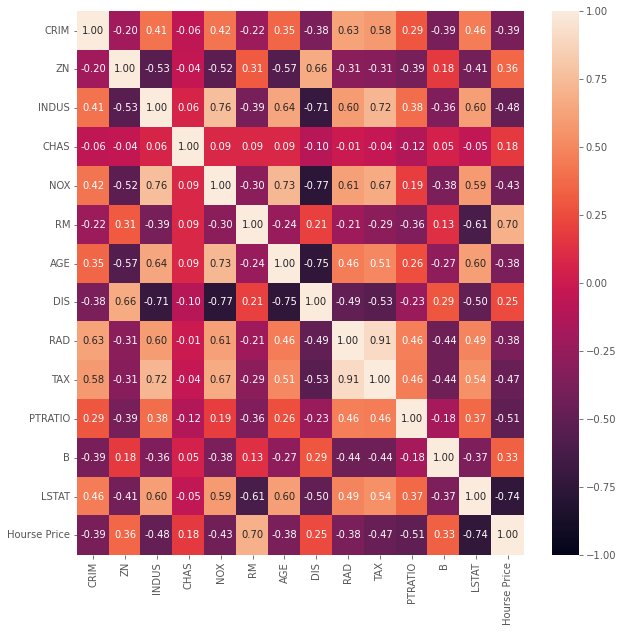

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(), annot=True, annot_kws={"fontsize":10}, fmt=".2f", vmin=-1)
plt.show()

In [38]:
#splittling the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print("Shape of train data  ",x_train.shape, y_train.shape) 
print("Shape of test data ", x_test.shape, y_test.shape) 

Shape of train data   (379, 13) (379,)
Shape of test data  (127, 13) (127,)


## Linear Regression 

In [39]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [30]:
#Calculating the Mean-Squared Error(MSE):
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)
accuracy_train = lreg.score(x_train,y_train)
accuracy_test = lreg.score(x_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)


Mean Squared Error: 43.305183369314655
Accuracy train:  0.8015226950541705
Accuracy test:  0.5387847668303805


In [19]:
"""putting together the coefficient and their corresponding variable names"""
lreg_coef = pd.DataFrame()
lreg_coef['Columns']= x_train.columns
lreg_coef['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coef)

    Columns  Coefficient Estimate
0      CRIM             -0.110732
1        ZN              0.045673
2     INDUS              0.007736
3      CHAS              1.742042
4       NOX            -12.734131
5        RM              4.763049
6       AGE             -0.024434
7       DIS             -1.389978
8       RAD              0.216888
9       TAX             -0.012962
10  PTRATIO             -0.958056
11        B              0.007313
12    LSTAT             -0.377469


## Lasso Regression

- In Lasso Regression, we add Mean Absolute Value of coefficients.
- Lasso regression can completely eliminate the variable by reducing its coefficient value to 0.

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [31]:
##Calculating the Mean-Squared Error(MSE):
mse1 = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error: ", mse1)
accuracy_train = lasso.score(x_train,y_train)
accuracy_test = lasso.score(x_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)

Mean Squared Error:  45.018710858121416
Accuracy train:  0.7506315853487182
Accuracy test:  0.5205351043464996


In [22]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

    Columns  Coefficient Estimate
0      CRIM             -0.059795
1        ZN              0.050107
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.713987
6       AGE              0.000000
7       DIS             -0.687784
8       RAD              0.185854
9       TAX             -0.015367
10  PTRATIO             -0.828477
11        B              0.006899
12    LSTAT             -0.604967


Lasso Regression will try to add one feature at a time, and if the new feature dosen't improves the fit enough to overweigh penalty term including that feature, then it won't be added. 

## Ridge Regression

- In Ridge Regression, we add Mean Square Values of coefficients. 
-  This term is the sum of squares of coefficient multiplied by the parameter.
- The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable.

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred2 = ridge.predict(x_test)

In [32]:
# Calculating the Mean Squared Error
mse2 = np.mean((y_pred2 - y_test)**2)
print("Mean Square Error:", mse2)
accuracy_train = ridge.score(x_train,y_train)
accuracy_test = ridge.score(x_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)

Mean Square Error: 44.077984283887396
Accuracy train:  0.800195140896674
Accuracy test:  0.5305541688678068


In [ ]:
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = x_train.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coef)

    Columns  Coefficient Estimate
0      CRIM             -0.097129
1        ZN              0.045796
2     INDUS              0.032435
3      CHAS              3.580084
4       NOX             -9.093340
5        RM              3.767093
6       AGE             -0.007918
7       DIS             -1.394501
8       RAD              0.314809
9       TAX             -0.012030
10  PTRATIO             -0.842492
11        B              0.011356
12    LSTAT             -0.619512


Notice that the above graphs can be misleading in a way that it shows some of the coefficients become **zero**. In Ridge Regularization, the coefficients **can never be 0**, they are just too small to observe in above plots.

## Elastic Net Regularization:

In elastic Net Regularization we added the both terms of L1 and L2 to get the final loss function.

In [28]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_test, y_test)
y_pred3 = enet.predict(x_test)

In [33]:
#Calculating0 the Mean Squared Error
mse3 = np.mean((y_pred3 - y_test)**2)
print("Mean Squared Error:", mse3)
accuracy_train = enet.score(x_train,y_train)
accuracy_test = enet.score(x_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)

Mean Squared Error: 36.55832015081508
Accuracy train:  0.6237155116249246
Accuracy test:  0.6106412017967489


In [15]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = x_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(enet.coef_)
print(enet_coef)

    Columns  Coefficient Estimate
0      CRIM              0.000000
1        ZN              0.084440
2     INDUS             -0.069981
3      CHAS             -0.000000
4       NOX             -0.000000
5        RM              1.123505
6       AGE             -0.007608
7       DIS             -1.444029
8       RAD              0.405378
9       TAX             -0.024808
10  PTRATIO             -0.691713
11        B              0.009736
12    LSTAT             -0.647171


Elasric Net performs performs better than Ridge and Lasso Regression for most of the test cases.
